Imports Needed

In [276]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

Import the dataframe without selective transformation.

In [277]:
df_for_modeling=pd.read_csv('../Data/movies_data_for_modeling.csv',index_col='Unnamed: 0')
df_for_modeling.head(10)

,id,popularity,runtime,video,vote_average,vote_count,release_year,release_month,release_day,has_homepage,...,total_movie_crew,number_of_A_list_crew_members_per_movie,number_of_B_list_crew_members_per_movie,number_of_C_list_crew_members_per_movie,number_of_D_list_crew_members_per_movie,total_cast_per_movie,number_of_A_list_cast_members_per_movie,number_of_B_list_cast_members_per_movie,number_of_C_list_cast_members_per_movie,number_of_D_list_cast_members_per_movie
0,862,21.946943,81.0,0,7.7,5415.0,1995,10,30,1,...,106.0,22.0,28.0,39.0,24.0,13.0,9.0,2.0,2.0,0.0
1,8844,17.015539,104.0,0,6.9,2413.0,1995,12,15,0,...,16.0,10.0,5.0,3.0,0.0,26.0,6.0,6.0,5.0,9.0
2,15602,11.712900,101.0,0,6.5,92.0,1995,12,22,0,...,4.0,3.0,2.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0
3,31357,3.859495,127.0,0,6.1,34.0,1995,12,22,0,...,10.0,3.0,5.0,3.0,2.0,10.0,7.0,3.0,1.0,0.0
4,11862,8.387519,106.0,0,5.7,173.0,1995,2,10,0,...,7.0,6.0,1.0,0.0,0.0,12.0,9.0,3.0,0.0,0.0
5,949,17.924927,170.0,0,7.7,1886.0,1995,12,15,0,...,71.0,32.0,25.0,18.0,4.0,65.0,24.0,11.0,22.0,8.0
6,11860,6.677277,127.0,0,6.2,141.0,1995,12,15,0,...,53.0,19.0,21.0,14.0,4.0,57.0,12.0,10.0,11.0,25.0
7,45325,2.561161,97.0,0,5.4,45.0,1995,12,22,0,...,4.0,4.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,0.0
8,9091,5.231580,106.0,0,5.5,174.0,1995,12,22,0,...,9.0,5.0,3.0,1.0,0.0,6.0,4.0,0.0,2.0,0.0
9,710,14.686036,130.0,0,6.6,1194.0,1995,11,16,1,...,46.0,13.0,20.0,13.0,3.0,20.0,11.0,7.0,3.0,0.0


Create the X and y without feature engineering and transform y to the log of y.

In [278]:
y=df_for_modeling['popularity']
X=df_for_modeling.drop(columns=['id','popularity'])
ln_y=np.log(y)
ln_y[y==0]=0

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Create the train test split of the X and log of y and then scale the X variables.

In [279]:
X_train,X_test,y_train,y_test=train_test_split(X,ln_y,random_state=200)
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


The standard linear regression was fit regression shows that the current data explains approximately 50% of the data. The most important coefficents are the average vote score, the release year, if the model has a tagline, if the film is a comedy or horror film, if the film is in english, if the film is produced in the usa, how neutral or negative the overview is, and how large the cast and crew are.

In [280]:
lr_stand=LinearRegression()
lr_stand.fit(X_train_sc,y_train)
print(lr_stand.score(X_train_sc,y_train),lr_stand.score(X_test_sc,y_test))
[{col,val} for col, val in zip(lr_stand.coef_,X.columns )]

0.5075684898226775 0.4989505526010614


[{0.06903736368832299, 'runtime'},
 {-0.028991891651522717, 'video'},
 {0.6790588550247889, 'vote_average'},
 {-0.034575616600555664, 'vote_count'},
 {0.4391914155861707, 'release_year'},
 {0.03613309243784937, 'release_month'},
 {0.06005307855584316, 'release_day'},
 {0.03312970477226012, 'has_homepage'},
 {0.15222841433087095, 'is_in_series'},
 {0.20619340671675582, 'has_tagline'},
 {0.126436324304771, 'has_poster'},
 {-0.13392461846595877, 'has_overview'},
 {0.05916861756672305, 'is_animation'},
 {0.15805995492786928, 'is_comedy'},
 {0.06872379543240217, 'is_family'},
 {0.056977765432322795, 'is_adventure'},
 {0.03295265142757245, 'is_fantasy'},
 {0.0625647950162625, 'is_romance'},
 {0.022574580901277494, 'is_crime'},
 {0.10318500531437783, 'is_thriller'},
 {0.005996074767762746, 'is_mystery'},
 {0.07105521013272462, 'is_science_fiction'},
 {-0.010708088971632682, 'is_music'},
 {0.14480383551229706, 'is_horror'},
 {0.010859829056622888, 'is_war'},
 {-0.15822426209416668, 'is_documen

The Lasso regularized model showed little improvement or change to the accuracy or coefficients.

In [281]:
las_stand=LassoCV()
las_stand.fit(X_train_sc,y_train)
print((las_stand.score(X_train_sc,y_train),las_stand.score(X_test_sc,y_test)))
[{col,val} for col, val in zip(las_stand.coef_,X.columns )]

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.5073819883086179, 0.49909065907688194)


[{0.06919736772881435, 'runtime'},
 {-0.0279744648029124, 'video'},
 {0.6788551023443802, 'vote_average'},
 {-0.029162537489164784, 'vote_count'},
 {0.43681193111217526, 'release_year'},
 {0.035420785127188305, 'release_month'},
 {0.059734221550513285, 'release_day'},
 {0.032059551002259976, 'has_homepage'},
 {0.15205383196865271, 'is_in_series'},
 {0.18382461430191713, 'has_tagline'},
 {0.1262076212508733, 'has_poster'},
 {0.028156695076019395, 'has_overview'},
 {0.058351809206003954, 'is_animation'},
 {0.15651045093232732, 'is_comedy'},
 {0.06764154520190284, 'is_family'},
 {0.05685198110905083, 'is_adventure'},
 {0.03247486079168762, 'is_fantasy'},
 {0.062471551965076075, 'is_romance'},
 {0.021329745668164386, 'is_crime'},
 {0.10239878818807575, 'is_thriller'},
 {0.00533744598083377, 'is_mystery'},
 {0.06989043968662646, 'is_science_fiction'},
 {-0.0099594554313317, 'is_music'},
 {0.14335052007346677, 'is_horror'},
 {0.008414718813215089, 'is_war'},
 {-0.1600607363201716, 'is_docume

The ridge regularization model showed little improvement or change to the accuracy or coefficients.

In [282]:
rg_stand=RidgeCV()
rg_stand.fit(X_train_sc,y_train)
print(rg_stand.score(X_train_sc,y_train),rg_stand.score(X_test_sc,y_test))
[{col,val} for col, val in zip(rg_stand.coef_,X.columns)]

0.5075635682285013 0.49899048254569645


[{0.06905114885346111, 'runtime'},
 {-0.028988329855813497, 'video'},
 {0.6788183471233894, 'vote_average'},
 {-0.03446313403516601, 'vote_count'},
 {0.4389864819805085, 'release_year'},
 {0.03611434848105505, 'release_month'},
 {0.06006535614407389, 'release_day'},
 {0.03319807580697808, 'has_homepage'},
 {0.15226491261219183, 'is_in_series'},
 {0.14874991444030872, 'has_tagline'},
 {0.12645134921205262, 'has_poster'},
 {-0.07775313965067795, 'has_overview'},
 {0.059189703564318005, 'is_animation'},
 {0.15802667531851858, 'is_comedy'},
 {0.06863316765349362, 'is_family'},
 {0.05700572350944365, 'is_adventure'},
 {0.033010314960384826, 'is_fantasy'},
 {0.06262763286521195, 'is_romance'},
 {0.02258035903047198, 'is_crime'},
 {0.10317805848578576, 'is_thriller'},
 {0.006025425096032697, 'is_mystery'},
 {0.07106771303859838, 'is_science_fiction'},
 {-0.010737935373686395, 'is_music'},
 {0.14475299817182832, 'is_horror'},
 {0.01083496461375788, 'is_war'},
 {-0.15817674403039708, 'is_docume

The feature engineered data is imported to see if there is any change to the data.

In [283]:
df_with_feature_engineering=pd.read_csv('../Data/movies_df_with_new_features.csv',index_col='Unnamed: 0')
df_with_feature_engineering.head()

,vote_average,vote_count,release_year,release_month,release_day,overview_negative_sentiment_score,overview_neutral_sentiment_score,overview_positive_sentiment_score,overview_compound_sentiment_score,overview_length,...,produced_in_france,produced_in_usa,produced_in_japan,produced_in_sweden,produced_in_italy,produced_in_germany,video,title_change,id,popularity
0,7.7,5415.0,1995,10,30,0.048,0.886,0.066,0.2500,303.0,...,0,1,0,0,0,0,0,0,862,21.946943
1,6.9,2413.0,1995,12,15,0.161,0.702,0.137,-0.4588,395.0,...,0,1,0,0,0,0,0,0,8844,17.015539
2,6.5,92.0,1995,12,22,0.168,0.791,0.041,-0.7645,327.0,...,0,1,0,0,0,0,0,0,15602,11.712900
3,6.1,34.0,1995,12,22,0.060,0.673,0.267,0.8860,270.0,...,0,1,0,0,0,0,0,0,31357,3.859495
4,5.7,173.0,1995,2,10,0.000,0.944,0.056,0.5023,318.0,...,0,1,0,0,0,0,0,0,11862,8.387519


X and y are created from the feature engineered data.

In [284]:
X_features=df_with_feature_engineering.drop(columns=['id','popularity'])
y=df_with_feature_engineering['popularity']
ln_y=np.log(y)
ln_y[y==0]=0

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


X features and y are train test split and then scaled for better performance.

In [285]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_features,ln_y,random_state=200)
ss=StandardScaler()
X_train_new_sc=ss.fit_transform(X_train_new)
X_test_new_sc=ss.transform(X_test_new)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


The linear regression shows a slight improvement in training, but is overfitting. The model is being run into a Lasso for regularization.

In [287]:
lr_stand=LinearRegression()
lr_stand.fit(X_train_new_sc,y_train_new)
print((lr_stand.score(X_train_new_sc,y_train_new),lr_stand.score(X_test_new_sc,y_test_new)))
[{col,val} for col, val in zip(lr_stand.coef_,X_features.columns)]

(0.5688580480005708, -29.75708711430731)


[{1.6856710272818067, 'vote_average'},
 {-0.06030699630427505, 'vote_count'},
 {-34.85501342242167, 'release_year'},
 {0.6200444192678805, 'release_month'},
 {0.10331443799431883, 'release_day'},
 {0.025913843459034525, 'overview_negative_sentiment_score'},
 {0.07729550622648322, 'overview_neutral_sentiment_score'},
 {0.06128672691659861, 'overview_positive_sentiment_score'},
 {-0.05108306818248487, 'overview_compound_sentiment_score'},
 {-9.66414464194025, 'overview_length'},
 {0.01287133536894858, 'tagline_negative_sentiment_score'},
 {0.03120633536709011, 'tagline_neutral_sentiment_score'},
 {-0.003780911452200747, 'tagline_positive_sentiment_score'},
 {0.02924739530841175, 'tagline_compound_sentiment_score'},
 {3.375068246856749, 'tagline_length'},
 {-4.900871539355595, 'original_title_length'},
 {3.1416909140406464, 'title_length'},
 {0.08528596683293721, 'title_negative_sentiment_score'},
 {0.04361662940004263, 'title_neutral_sentiment_score'},
 {-0.028705505496785078, 'title_pos

The Lasso model has regularized and shows a slight improvement in training and test. the most important features are the vote average,the release year squared, the total cast, the number of A list actors and if it was produced in the USA.

In [295]:
las_stand.fit(X_train_new_sc,y_train_new)
print((las_stand.score(X_train_new_sc,y_train_new),las_stand.score(X_test_new_sc,y_test_new)))
coefs=pd.DataFrame([{'column':col, 'coef':val} for val, col in zip(las_stand.coef_,X_features.columns)])
coefs.sort_values('coef',ascending=False).head()

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.5544155695858474, 0.5450735000804094)


/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,column,coef
0,vote_average,1.701903
47,release_year_sq,0.423502
39,total_cast_per_movie,0.272464
35,number_of_A_list_crew_members_per_movie,0.231574
209,produced_in_usa,0.176778


The regularized columns are then dumped to be refit into a standard linear regression.

In [293]:
new_cols_names=coefs['column'][coefs.coef!=0]
print(list(new_cols_names)[:5])

['vote_average', 'vote_count', 'release_month', 'release_day', 'overview_negative_sentiment_score']


The regularized X is created using the non zero columns from the Lasso model.

In [297]:
X_final=X_features[new_cols_names]
X_train_final,X_test_final,y_train_new,y_test_new=train_test_split(X_final,ln_y,random_state=200)
ss=StandardScaler()
X_train_final_sc=ss.fit_transform(X_train_final)
X_test_final_sc=ss.transform(X_test_final)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


The new linear regression shows a slight improvement with similar important columns as the lasso model.

In [298]:
lr_stand=LinearRegression()
lr_stand.fit(X_train_final_sc,y_train)
print(lr_stand.score(X_train_final_sc,y_train),lr_stand.score(X_test_final_sc,y_test))
[{col,val} for col, val in zip(lr_stand.coef_,X_final.columns )]

0.5548017136102348 0.5452819000785868


[{1.7348602640161785, 'vote_average'},
 {0.10029844561851076, 'vote_count'},
 {0.07102475163150568, 'release_month'},
 {-0.10135592370987137, 'release_day'},
 {-0.01524875550307564, 'overview_negative_sentiment_score'},
 {0.0036121335762739626, 'overview_neutral_sentiment_score'},
 {-0.009418792924355948, 'tagline_positive_sentiment_score'},
 {0.012528932576142793, 'tagline_compound_sentiment_score'},
 {-0.12023892702012579, 'original_title_length'},
 {-0.009951910963285265, 'title_negative_sentiment_score'},
 {0.02763433331796533, 'title_compound_sentiment_score'},
 {-0.009013644984979682, 'original_title_postive_sentiment_score'},
 {-0.010825761955521335, 'original_title_compound_sentiment_score'},
 {0.1325449332474506, 'total_movie_keywords'},
 {0.044066425499309184, 'second_least_used_keywords_per_movie'},
 {0.0133472175328202, 'average_keyword_negative_sentiment_per_movie'},
 {-0.017787011886523516, 'average_keyword_postive_sentiment_per_movie'},
 {0.11709620276339117, 'total_movi

A new X and y are created for a decision tree and random forrest regression model.

In [169]:
y=df_for_modeling['popularity']
X=df_for_modeling.drop(columns=['id','popularity'])
X_train_tree,X_test_tree,y_train_tree,y_test_tree=train_test_split(X,y,random_state=200)

A decision tree is fit and while trains to perfection, it tests worst than a standard model.

In [204]:
dt=DecisionTreeRegressor()
dt.fit(X_train_tree,y_train_tree)
(dt.score(X_train_tree,y_train_tree),dt.score(X_test_tree,y_test_tree))

(0.9999989521675521, -0.5785944201438031)

X is scaled to hopeful improve performance, but it does not work.

In [173]:
X_train_tree_sc=ss.fit_transform(X_train_tree)
X_test_tree_sc=ss.transform(X_test_tree)
dt.fit(X_train_tree_sc,y_train_tree)
(dt.score(X_train_tree_sc,y_train_tree),dt.score(X_test_tree_sc,y_test_tree))

(0.9999989521675521, -0.675278898074428)

A random forest regressor is fit and while it test well it does not improve the test scores at all.

In [214]:
rf=RandomForestRegressor()
rf.fit(X_train_tree,y_train_tree)
(rf.score(X_train_tree,y_train_tree),rf.score(X_test_tree,y_test_tree))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9187503810596771, 0.3674341021275854)

In [215]:
rf.fit(X_train_tree_sc,y_train_tree)
(rf.score(X_train_tree_sc,y_train_tree),rf.score(X_test_tree_sc,y_test_tree))

(0.8824074612322496, 0.4443325162074137)

When decomposing the non feature generated X variables, this was placed into a standard linear regression and provided no additional scoring improvements.

In [239]:
pca=PCA()
X_pca=pca.fit_transform(X)
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,ln_y,random_state=200)
X_train_pca_sc=ss.fit_transform(X_train_pca)
X_test_pca_sc=ss.transform(X_test_pca)

In [242]:
lr_stand.fit(X_train_pca_sc,y_train_pca)
(lr_stand.score(X_train_pca_sc,y_train_pca),lr_stand.score(X_test_pca_sc,y_test_pca))

(0.5075684898226775, 0.4989505526010616)

When training a value of polynomial features, this will include all second and third degree polynomial features. When looking at the scores of have not improved drastically, so more information may be necessary.

In [300]:
pp=PolynomialFeatures()
X_pp=pp.fit_transform(X)
X_train_pp,X_test_pp,y_train_pp,y_test_pp=train_test_split(X_pp,ln_y,random_state=200)
X_train_pp_sc=ss.fit_transform(X_train_pp)
X_test_pp_sc=ss.transform(X_test_pp)

In [246]:
las_stand.fit(X_train_pp_sc,y_train_pp)
(las_stand.score(X_train_pp_sc,y_train_pp),las_stand.score(X_test_pp_sc,y_test_pp))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWar

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceW

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceW

(0.5806674073030453, 0.555477958077133)

In [249]:
rg_stand=RidgeCV()
rg_stand.fit(X_train_pp_sc,y_train_pp)
print(rg_stand.score(X_train_pp_sc,y_train_pp),rg_stand.score(X_test_pp_sc,y_test_pp))

0.6556588881644407 0.3769029608741853


Modeling shows that the model performs at approximately 55%-56% accuracy and when looking at scatters of the training and testing predicted and actual values, the model is having problems generalizing the smaller data. While the model can predict a very popular score, the lower scores are much more difficult to ascertain. Considering over half of the data has a popularity score of 0 to 1 this makes sense.

In [299]:
X_final=X_features[new_cols_names]
X_train_final,X_test_final,y_train_final,y_test_final=train_test_split(X_final,ln_y,random_state=200)
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train_final)
X_test_sc=ss.transform(X_test_final)
lr_stand=LinearRegression()
lr_stand.fit(X_train_sc,y_train_final)
print(lr_stand.score(X_train_sc,y_train_final),lr_stand.score(X_test_sc,y_test_final))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


0.5548017136102348 0.5452819000785867


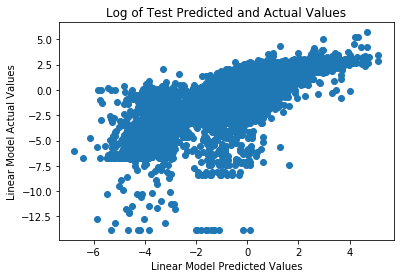

In [270]:
plt.scatter(x=lr_stand.predict(X_test_sc),y=y_test_final)
plt.xlabel('Linear Model Predicted Values')
plt.ylabel('Linear Model Actual Values')
plt.title('Log of Test Predicted and Actual Values');

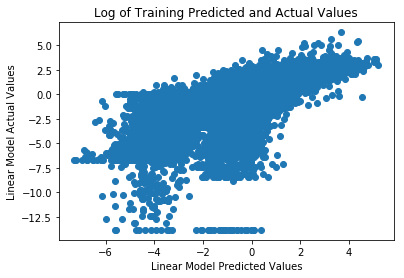

In [269]:
plt.scatter(x=lr_stand.predict(X_train_sc),y=y_train_final)
plt.xlabel('Linear Model Predicted Values')
plt.ylabel('Linear Model Actual Values')
plt.title('Log of Training Predicted and Actual Values');

In [301]:
lr_stand.coef_

array([ 1.73486026,  0.10029845,  0.07102475, -0.10135592, -0.01524876,
        0.00361213, -0.00941879,  0.01252893, -0.12023893, -0.00995191,
        0.02763433, -0.00901364, -0.01082576,  0.13254493,  0.04406643,
        0.01334722, -0.01778701,  0.1170962 ,  0.23740608,  0.14121005,
        0.05420912,  0.27677605,  0.03211884,  0.00727921, -1.14560004,
        0.09609524, -0.12446641,  0.4197101 , -0.16967933,  0.36709063,
       -0.07127036, -0.06674191,  0.04989949,  0.01278413,  0.0182285 ,
        0.00221799, -0.03589441,  0.04684512, -0.01386807, -0.02270907,
        0.01681903,  0.10821472,  0.17586525,  0.0632626 ,  0.05989154,
       -0.0775104 , -0.26489008,  0.00307558, -0.00631672,  0.01252222,
       -0.00287741,  0.01033087, -0.02414129, -0.02575142,  0.00644796,
        0.01626051,  0.01214199, -0.21486556, -0.17435956, -0.04017553,
        0.00655135,  0.03168896,  0.00672267, -0.02844006, -0.01469233,
       -0.02085192, -0.03064151,  0.09561878, -0.04710505, -0.01